In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

## Criar lista de arquivos e dicionário

In [93]:
arquivos = os.listdir("./dados_2002_21/")
estados = {}
print(arquivos)

['Tabela1.xls', 'Tabela10.xls', 'Tabela11.xls', 'Tabela12.xls', 'Tabela13.xls', 'Tabela14.xls', 'Tabela15.xls', 'Tabela16.xls', 'Tabela17.xls', 'Tabela18.xls', 'Tabela19.xls', 'Tabela2.xls', 'Tabela20.xls', 'Tabela21.xls', 'Tabela22.xls', 'Tabela23.xls', 'Tabela24.xls', 'Tabela25.xls', 'Tabela26.xls', 'Tabela27.xls', 'Tabela28.xls', 'Tabela29.xls', 'Tabela3.xls', 'Tabela30.xls', 'Tabela31.xls', 'Tabela32.xls', 'Tabela33.xls', 'Tabela4.xls', 'Tabela5.xls', 'Tabela6.xls', 'Tabela7.xls', 'Tabela8.xls', 'Tabela9.xls']


In [94]:
def extair_dados(arquivo, celula):
    number = re.findall(r'\d+', arquivo)
    df = pd.read_excel("./dados_2002_21/" + arquivo, sheet_name='Tabela' + number[0] + '.' + str(celula))
    df = df.loc[53:len(df)-2]
    categoria = df.iloc[2,0]
    local = df.iloc[1,0]
    dados_anuais = pd.DataFrame()
    dados_anuais[['Ano','Valor_ano_anterior','Valor_preço_anterior','Valor_corrente']] = df.iloc[4:,[0,1,3,5]].fillna(0)
    dados_anuais[['Categoria','Local']] = categoria,local
    #dados_anuais = dados_anuais.fillna(0)
    dados_anuais['Taxa de Crescimento'] = (dados_anuais['Valor_preço_anterior']/dados_anuais['Valor_ano_anterior'])-1
    
    #criar funções para tratar colunas novas
    return dados_anuais, categoria

def extrair_local(arquivo, celula):
    number = re.findall(r'\d+', arquivo)
    df = pd.read_excel("./dados_2002_21/" + arquivo, sheet_name='Tabela' + number[0] + '.' + str(celula))
    df = df.loc[53:len(df)-2]
    #categoria = df.iloc[2,0]
    local = df.iloc[1,0]
    return local

In [95]:
#Monta o dicionario a ser usado
for i in arquivos:
    celula = 1
    local = extrair_local(i, celula)
    estados[local] = dict()
    #falta loopar pelas celulas
    for celula in range(1,17):
        dados_anuais, categoria = extair_dados(i, celula)
        estados[local][categoria] = dados_anuais

locais = list(estados.keys())
locais

for i in estados['Rio de Janeiro'].keys():
    print(i)

#cria os dados para indústria agregando as 4 categorias
for i in locais:
  estados[i]['Indústria'] = pd.DataFrame()
  estados[i]['Indústria']['Valor_ano_anterior'] = estados[i]['Indústrias extrativas']['Valor_ano_anterior']+estados[i]['Indústrias de Transformação']['Valor_ano_anterior']+estados[i]['Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação']['Valor_ano_anterior']+estados[i]['Construção']['Valor_ano_anterior']
  estados[i]['Indústria']['Valor_preço_anterior'] = estados[i]['Indústrias extrativas']['Valor_preço_anterior']+estados[i]['Indústrias de Transformação']['Valor_preço_anterior']+estados[i]['Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação']['Valor_preço_anterior']+estados[i]['Construção']['Valor_preço_anterior']
  estados[i]['Indústria']['Valor_corrente'] = estados[i]['Indústrias extrativas']['Valor_corrente']+estados[i]['Indústrias de Transformação']['Valor_corrente']+estados[i]['Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação']['Valor_corrente']+estados[i]['Construção']['Valor_corrente']
  estados[i]['Indústria']['Taxa de Crescimento'] = estados[i]['Indústria']['Valor_preço_anterior']/estados[i]['Indústria']['Valor_ano_anterior']-1
  estados[i]['Indústria']['Ano'] = range(2002,2022)
  

C:\Users\leoau\AppData\Local\Temp\ipykernel_4344\3347134398.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_anuais[['Ano','Valor_ano_anterior','Valor_preço_anterior','Valor_corrente']] = df.iloc[4:,[0,1,3,5]].fillna(0)
C:\Users\leoau\AppData\Local\Temp\ipykernel_4344\3347134398.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_anuais[['Ano','Valor_ano_anterior','Valor_preço_anterior','Valor_corrente']] = df.iloc[4:,[0,1,3,5]].fillna(0)
C:\Users\leoau\AppData\Local\Temp\ipykernel_4344\3347134398.py:8: FutureWarning: Downcasting object dt

Total das Atividades
Agropecuária
Indústrias extrativas
Indústrias de Transformação
Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação
Construção
Comércio e reparação de veículos automotores e motocicletas
Transporte, armazenagem e correio
Alojamento e alimentação
Informação e comunicação
Atividades financeiras, de seguros e serviços relacionados
Atividades Imobiliárias
Atividades profissionais, científicas e técnicas, administrativas e serviços complementares
Administração, defesa, educação e saúde públicas e seguridade social
Educação e saúde privadas
Outras atividades de serviços


In [96]:
estados['Paraná']['Indústria']

,Valor_ano_anterior,Valor_preço_anterior,Valor_corrente,Taxa de Crescimento,Ano
57,0.000000,0.000000,23308.010445,NaN,2002
58,23308.010445,23662.602945,28301.257345,0.015213,2003
59,28301.257345,30763.178666,33450.052400,0.086990,2004
60,33450.052400,33313.794862,33836.920386,-0.004073,2005
61,33836.920386,33628.652637,35491.045720,-0.006155,2006
62,35491.045720,38002.559070,41390.051256,0.070765,2007
63,41390.051256,43134.547726,44581.807414,0.042148,2008
64,44581.807414,43326.117091,48466.186679,-0.028166,2009
65,48466.186679,53867.028301,54221.391000,0.111435,2010
66,54221.391000,58834.187296,62004.882442,0.085073,2011


## Criação de CSVs com dados de conjuntos de territórios

In [110]:
locais_importantes = ['Rio de Janeiro','Região Sudeste','São Paulo', 'Brasil']
atividades_importantes = ['Total das Atividades','Indústrias extrativas',
                          'Indústrias de Transformação',
                          'Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação',
                          'Construção']


for local in locais_importantes:
    df_completo = pd.DataFrame(columns=estados['Rio de Janeiro']['Indústrias de Transformação'].keys())
    df_completo = df_completo.set_index('Ano')
    df_completo.drop(labels=['Categoria','Local'],axis=1,inplace=True)
    for atividade in atividades_importantes:
        novo_df = pd.DataFrame(estados[local][atividade])
        novo_df = novo_df.set_index('Ano')
        novo_df.drop(labels=['Categoria','Local'],axis=1,inplace=True)
        novo_df =  novo_df.add_suffix("_"+atividade)
        df_completo = df_completo.join(novo_df, on='Ano', how='right')
    df_completo = df_completo.iloc[:,4:]
    local = local.replace(' ','_')
    df_completo.to_csv('./recortes_regionais/'+local+'.csv')

## Criacao de CSVs com atividades separadas por territorio

In [61]:
locais_importantes = ['Rio de Janeiro','Região Sudeste','São Paulo', 'Brasil']
atividades_importantes = ['Total das Atividades','Indústrias extrativas',
                          'Indústrias de Transformação',
                          'Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação',
                          'Construção']
prefixo = 1
recorte = 'recortes_setoriais'
for local in locais_importantes:
    for atividade in atividades_importantes:
        estados[local][atividade].to_csv(recorte+'/'+str(prefixo)+'_'+str(local)+'_'+str(atividade)+'.csv')
    prefixo = prefixo + 1

In [62]:
tabelas_jornada = os.listdir("./"+recorte)
print(tabelas_jornada)

['1_Rio de Janeiro_Construção.csv', '1_Rio de Janeiro_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação.csv', '1_Rio de Janeiro_Indústrias de Transformação.csv', '1_Rio de Janeiro_Indústrias extrativas.csv', '1_Rio de Janeiro_Total das Atividades.csv', '2_Região Sudeste_Construção.csv', '2_Região Sudeste_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação.csv', '2_Região Sudeste_Indústrias de Transformação.csv', '2_Região Sudeste_Indústrias extrativas.csv', '2_Região Sudeste_Total das Atividades.csv', '3_São Paulo_Construção.csv', '3_São Paulo_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação.csv', '3_São Paulo_Indústrias de Transformação.csv', '3_São Paulo_Indústrias extrativas.csv', '3_São Paulo_Total das Atividades.csv', '4_Brasil_Construção.csv', '4_Brasil_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação.csv', '4_Brasil_Indústrias de Transformaç

In [63]:
tabela_final = pd.DataFrame(columns=estados['Rio de Janeiro']['Indústrias de Transformação'].keys())
for tabela in tabelas_jornada:
    df = pd.read_csv("./"+recorte+'/'+tabela, index_col=0)
    tabela_final = tabela_final.join(df,on='Ano',how='outer',rsuffix=str(tabela))

tabela_final.head()
#tabela_final.head()

,Ano,Valor_ano_anterior,Valor_preço_anterior,Valor_corrente,Categoria,Local,Taxa de Crescimento,Ano1_Rio de Janeiro_Construção.csv,Valor_ano_anterior1_Rio de Janeiro_Construção.csv,Valor_preço_anterior1_Rio de Janeiro_Construção.csv,...,Categoria4_Brasil_Indústrias extrativas.csv,Local4_Brasil_Indústrias extrativas.csv,Taxa de Crescimento4_Brasil_Indústrias extrativas.csv,Ano4_Brasil_Total das Atividades.csv,Valor_ano_anterior4_Brasil_Total das Atividades.csv,Valor_preço_anterior4_Brasil_Total das Atividades.csv,Valor_corrente4_Brasil_Total das Atividades.csv,Categoria4_Brasil_Total das Atividades.csv,Local4_Brasil_Total das Atividades.csv,Taxa de Crescimento4_Brasil_Total das Atividades.csv
57,57,NaN,NaN,NaN,NaN,NaN,NaN,2002,0.000000,0.000000,...,Indústrias extrativas,Brasil,NaN,2002,0.000000e+00,0.000,1.270215e+06,Total das Atividades,Brasil,NaN
58,58,NaN,NaN,NaN,NaN,NaN,NaN,2003,11581.665827,10887.638790,...,Indústrias extrativas,Brasil,0.045828,2003,1.270215e+06,1285796.439,1.470717e+06,Total das Atividades,Brasil,0.012267
59,59,NaN,NaN,NaN,NaN,NaN,NaN,2004,9320.982137,10140.230385,...,Indústrias extrativas,Brasil,-0.004693,2004,1.470717e+06,1553911.221,1.661982e+06,Total das Atividades,Brasil,0.056567
60,60,NaN,NaN,NaN,NaN,NaN,NaN,2005,10968.564223,10397.660691,...,Indústrias extrativas,Brasil,0.068071,2005,1.661982e+06,1712074.247,1.842818e+06,Total das Atividades,Brasil,0.030140
61,61,NaN,NaN,NaN,NaN,NaN,NaN,2006,10678.584565,10356.799776,...,Indústrias extrativas,Brasil,0.065246,2006,1.842818e+06,1910748.664,2.049290e+06,Total das Atividades,Brasil,0.036862


## Geração de graficos comparativos

In [43]:
def criacao_df_grafico(atividade,serie_dados):
    #Cria DF base
    locais_excluidos=['Região Sudeste','Região Norte','Região Nordeste','Região Centro-Oeste','Região Sul']
    df = pd.DataFrame()
    df['Ano'] = range(2002,2022)
    df = df.set_index('Ano')
    for i in locais:
        if i not in locais_excluidos:
            df[i] = estados[i][atividade][['Ano',serie_dados]].set_index('Ano')

    #FORMA DF para grafico daquelas variáveis
    df = df.reset_index()
    df.index = pd.to_datetime(df['Ano'], format='%Y')
    df = df.iloc[:,1:]
    df['Média']=df.drop('Brasil', axis=1).mean(axis=1) # elimina Brasil para não distorcer média

    return df

In [44]:
def criacao_ranking(nome,df):
    #geração de ranking de estados pela variável
    ranking =  pd.DataFrame()
    ranking['2002-2021'] = df.iloc[:,:].mean()
    ranking['2002-2009'] = df.iloc[0:7,:].mean()
    ranking['2010-2015'] = df.iloc[7:13,:].mean()
    ranking['2016-2021'] = df.iloc[13:,:].mean()

    ranking.to_csv('./rankings/ranking_'+ nome +'.csv')

### Taxa de Crescimento, PIB

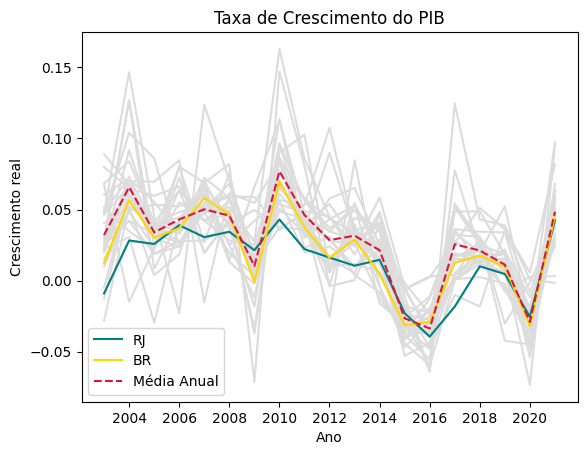

In [37]:
#PLOTAR GRAFICO COMPARATIVO
df_PIB_crescimento = criacao_df_grafico('Total das Atividades','Taxa de Crescimento')
#df_taxa_crescimento.head()

fig, ax = plt.subplots()
ax.plot(df_PIB_crescimento.drop('Média', axis=1), color='gainsboro')
ax.plot(df_PIB_crescimento['Rio de Janeiro'], color='teal', label='RJ')
ax.plot(df_PIB_crescimento['Brasil'], color = 'gold', label='BR')
ax.plot(df_PIB_crescimento['Média'], color = 'crimson', label='Média Anual', linestyle='--')

plt.title('Taxa de Crescimento do PIB')
plt.ylabel('Crescimento real')
plt.xlabel('Ano')
plt.legend()
plt.savefig('./figuras/PIB_crescimento.svg')
plt.show()


In [47]:
criacao_ranking('PIB_crescimento',df_PIB_crescimento)

### Taxa de Crescimento, Indústria geral

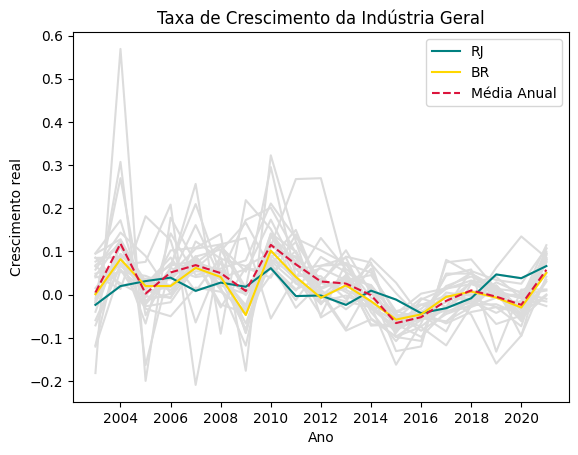

In [45]:
#PLOTAR GRAFICO COMPARATIVO
df_industria_crescimento = criacao_df_grafico('Indústria','Taxa de Crescimento')
#df_taxa_crescimento.head()

fig, ax = plt.subplots()
ax.plot(df_industria_crescimento.drop('Média', axis=1), color='gainsboro')
ax.plot(df_industria_crescimento['Rio de Janeiro'], color='teal', label='RJ')
ax.plot(df_industria_crescimento['Brasil'], color = 'gold', label='BR')
ax.plot(df_industria_crescimento['Média'], color = 'crimson', label='Média Anual', linestyle='--')

plt.title('Taxa de Crescimento da Indústria Geral')
plt.ylabel('Crescimento real')
plt.xlabel('Ano')
plt.legend()
plt.savefig('./figuras/industria_crescimento.svg')
plt.show()

In [51]:
#geração de ranking de estados pela variável
criacao_ranking('Industria_crescimento',df_industria_crescimento)

### Taxa de Crescimento, Ind. de Transformação

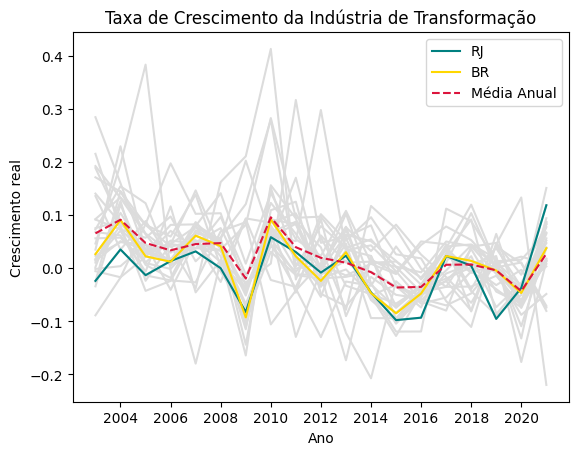

In [90]:
#PLOTAR GRAFICO COMPARATIVO
df_transf_crescimento = criacao_df_grafico('Indústrias de Transformação','Taxa de Crescimento')

fig, ax = plt.subplots()
ax.plot(df_transf_crescimento.drop('Média', axis=1), color='gainsboro')
ax.plot(df_transf_crescimento['Rio de Janeiro'], color='teal', label='RJ')
ax.plot(df_transf_crescimento['Brasil'], color = 'gold', label='BR')
ax.plot(df_transf_crescimento['Média'], color = 'crimson', label='Média Anual', linestyle='--')

plt.title('Taxa de Crescimento da Indústria de Transformação')
plt.ylabel('Crescimento real')
plt.xlabel('Ano')
plt.legend()
plt.savefig('./figuras/transf_crescimento.svg')
plt.show()

In [50]:
criacao_ranking('Transf_crescimento',df_transf_crescimento)

### Taxa de Crescimento, Extrativa

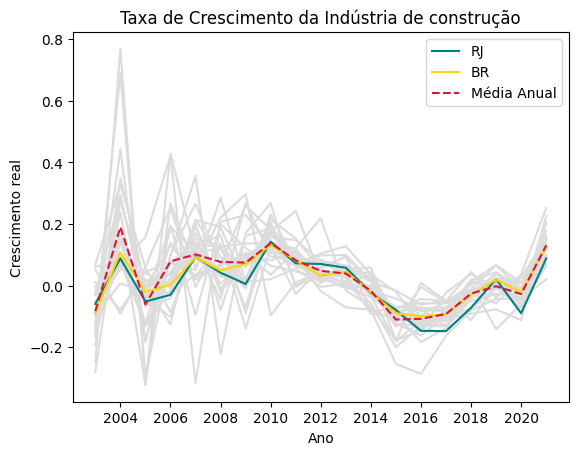

In [89]:
#PLOTAR GRAFICO COMPARATIVO
df_extrativa_crescimento = criacao_df_grafico('Construção','Taxa de Crescimento')


fig, ax = plt.subplots()
ax.plot(df_extrativa_crescimento.drop('Média', axis=1), color='gainsboro')
ax.plot(df_extrativa_crescimento['Rio de Janeiro'], color='teal', label='RJ')
ax.plot(df_extrativa_crescimento['Brasil'], color = 'gold', label='BR')
ax.plot(df_extrativa_crescimento['Média'], color = 'crimson', label='Média Anual', linestyle='--')

plt.title('Taxa de Crescimento da Indústria de construção')
plt.ylabel('Crescimento real')
plt.xlabel('Ano')
plt.legend()
plt.savefig('./figuras/extrativa_crescimento.svg')
plt.show()

In [54]:
criacao_ranking('Extrativa_crescimento',df_extrativa_crescimento)

### Taxa de Crescimento, Construção

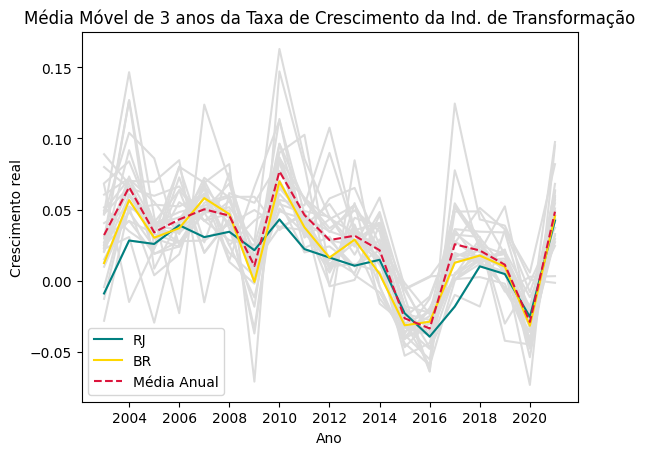

In [56]:
#PLOTAR GRAFICO COMPARATIVO
df_construcao_crescimento = criacao_df_grafico('Total das Atividades','Taxa de Crescimento')

fig, ax = plt.subplots()
ax.plot(df_construcao_crescimento.drop('Média', axis=1), color='gainsboro')
ax.plot(df_construcao_crescimento['Rio de Janeiro'], color='teal', label='RJ')
ax.plot(df_construcao_crescimento['Brasil'], color = 'gold', label='BR')
ax.plot(df_construcao_crescimento['Média'], color = 'crimson', label='Média Anual', linestyle='--')

plt.title('Média Móvel de 3 anos da Taxa de Crescimento da Ind. de Transformação')
plt.ylabel('Crescimento real')
plt.xlabel('Ano')
plt.legend()
plt.savefig('./figuras/construcao_crescimento.svg')
plt.show()

In [57]:
criacao_ranking('Construcao_crescimento',df_construcao_crescimento)

## Dados apenas do Rio

In [71]:
#TRATAR DF para participação dos setores
def calcula_part(df):
  df['Valor_ano_anterior_Industria'] = df['Valor_ano_anterior_Indústrias extrativas']+df['Valor_ano_anterior_Indústrias de Transformação']+df['Valor_ano_anterior_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação']+df['Valor_ano_anterior_Construção']
  df['Valor_preço_anterior_Industria'] = df['Valor_preço_anterior_Indústrias extrativas']+df['Valor_preço_anterior_Indústrias de Transformação']+df['Valor_preço_anterior_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação']+df['Valor_preço_anterior_Construção']
  df['Valor_corrente_Industria'] = df['Valor_corrente_Indústrias extrativas']+df['Valor_corrente_Indústrias de Transformação']+df['Valor_corrente_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação']+df['Valor_corrente_Construção']
  df['Taxa de Crescimento_Industria'] = df['Valor_preço_anterior_Industria']/df['Valor_ano_anterior_Industria']-1
  df['Participação_Industria'] = df['Valor_corrente_Industria']/df['Valor_corrente_Total das Atividades']
  df['Participação_Indústrias extrativas'] = df['Valor_corrente_Indústrias extrativas']/df['Valor_corrente_Total das Atividades']
  df['Participação_Indústrias de Transformação'] = df['Valor_corrente_Indústrias de Transformação']/df['Valor_corrente_Total das Atividades']
  df['Participação_Construção'] = df['Valor_corrente_Construção']/df['Valor_corrente_Total das Atividades']
  df['Participação_Serviços'] = df['Valor_corrente_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação']/df['Valor_corrente_Total das Atividades']
  df.set_index('Ano', inplace=True)

  return df

In [105]:

df_rio = pd.read_csv('/recortes_regionais/Rio_de_Janeiro.csv')
df_rio = calcula_part(df_rio)
df_rio.head()

,Valor_ano_anterior_Total das Atividades,Valor_preço_anterior_Total das Atividades,Valor_corrente_Total das Atividades,Taxa de Crescimento_Total das Atividades,Valor_ano_anterior_Indústrias extrativas,Valor_preço_anterior_Indústrias extrativas,Valor_corrente_Indústrias extrativas,Taxa de Crescimento_Indústrias extrativas,Valor_ano_anterior_Indústrias de Transformação,Valor_preço_anterior_Indústrias de Transformação,...,Taxa de Crescimento_Construção,Valor_ano_anterior_Industria,Valor_preço_anterior_Industria,Valor_corrente_Industria,Taxa de Crescimento_Industria,Participação_Industria,Participação_Indústrias extrativas,Participação_Indústrias de Transformação,Participação_Construção,Participação_Serviços
Ano,,,,,,,,,,,,,,,,,,,,,
2002,0.000000,0.000000,157947.564591,NaN,0.000000,0.000000,15446.549487,NaN,0.000000,0.000000,...,NaN,0.000000,0.000000,43222.791971,NaN,0.273653,0.097795,0.070688,0.073326,0.031843
2003,157947.564591,156509.845745,175430.466376,-0.009103,15446.549487,15553.450207,19791.039773,0.006921,11165.029985,10900.109800,...,-0.059925,43222.791971,42205.650951,49897.165340,-0.023533,0.284427,0.112814,0.087701,0.053132,0.030780
2004,175430.466376,180371.079263,199826.624078,0.028163,19791.039773,19013.085260,23174.479357,-0.039308,15385.394409,15929.579707,...,0.087893,49897.165340,50892.317018,60686.374604,0.019944,0.303695,0.115973,0.102891,0.054890,0.029941
2005,199826.624078,204971.367797,227038.904140,0.025746,23174.479357,25844.232576,36498.827549,0.115202,20560.307963,20292.313608,...,-0.052049,60686.374604,62597.075930,74503.631453,0.031485,0.328154,0.160760,0.088786,0.047034,0.031574
2006,227038.904140,235877.366724,253626.466332,0.038929,36498.827549,39049.102771,48846.717961,0.069873,20157.784292,20431.119575,...,-0.030134,74503.631453,77441.579228,88694.875971,0.039434,0.349707,0.192593,0.083804,0.042731,0.030578


In [106]:
#Tratamento da coluna ano como data
df_rio = df_rio.reset_index()
df_rio.index = pd.to_datetime(df_rio['Ano'], format='%Y')
df_rio.drop('Ano',axis=1, inplace=True)
df_rio.head()

,Valor_ano_anterior_Total das Atividades,Valor_preço_anterior_Total das Atividades,Valor_corrente_Total das Atividades,Taxa de Crescimento_Total das Atividades,Valor_ano_anterior_Indústrias extrativas,Valor_preço_anterior_Indústrias extrativas,Valor_corrente_Indústrias extrativas,Taxa de Crescimento_Indústrias extrativas,Valor_ano_anterior_Indústrias de Transformação,Valor_preço_anterior_Indústrias de Transformação,...,Taxa de Crescimento_Construção,Valor_ano_anterior_Industria,Valor_preço_anterior_Industria,Valor_corrente_Industria,Taxa de Crescimento_Industria,Participação_Industria,Participação_Indústrias extrativas,Participação_Indústrias de Transformação,Participação_Construção,Participação_Serviços
Ano,,,,,,,,,,,,,,,,,,,,,
2002-01-01,0.000000,0.000000,157947.564591,NaN,0.000000,0.000000,15446.549487,NaN,0.000000,0.000000,...,NaN,0.000000,0.000000,43222.791971,NaN,0.273653,0.097795,0.070688,0.073326,0.031843
2003-01-01,157947.564591,156509.845745,175430.466376,-0.009103,15446.549487,15553.450207,19791.039773,0.006921,11165.029985,10900.109800,...,-0.059925,43222.791971,42205.650951,49897.165340,-0.023533,0.284427,0.112814,0.087701,0.053132,0.030780
2004-01-01,175430.466376,180371.079263,199826.624078,0.028163,19791.039773,19013.085260,23174.479357,-0.039308,15385.394409,15929.579707,...,0.087893,49897.165340,50892.317018,60686.374604,0.019944,0.303695,0.115973,0.102891,0.054890,0.029941
2005-01-01,199826.624078,204971.367797,227038.904140,0.025746,23174.479357,25844.232576,36498.827549,0.115202,20560.307963,20292.313608,...,-0.052049,60686.374604,62597.075930,74503.631453,0.031485,0.328154,0.160760,0.088786,0.047034,0.031574
2006-01-01,227038.904140,235877.366724,253626.466332,0.038929,36498.827549,39049.102771,48846.717961,0.069873,20157.784292,20431.119575,...,-0.030134,74503.631453,77441.579228,88694.875971,0.039434,0.349707,0.192593,0.083804,0.042731,0.030578


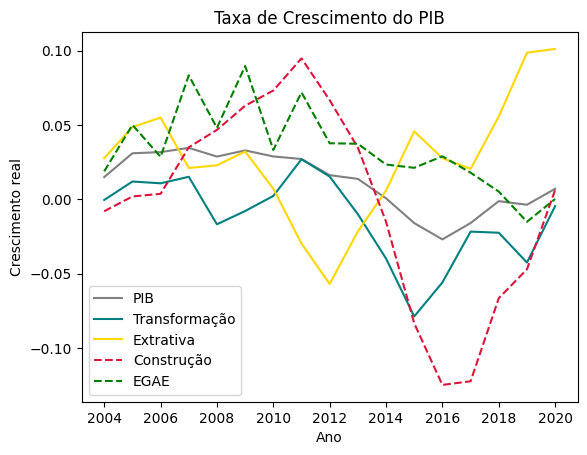

In [107]:
#FORMA DF para grafico daquelas variáveis

fig, ax = plt.subplots()
ax.plot(df_rio['Taxa de Crescimento_Total das Atividades'].rolling(3,center=True).mean(), color='grey', label='PIB')
ax.plot(df_rio['Taxa de Crescimento_Indústrias de Transformação'].rolling(3,center=True).mean(), color='teal', label='Transformação')
ax.plot(df_rio['Taxa de Crescimento_Indústrias extrativas'].rolling(3,center=True).mean(), color = 'gold', label='Extrativa')
ax.plot(df_rio['Taxa de Crescimento_Construção'].rolling(3,center=True).mean(), color = 'crimson', label='Construção', linestyle='--')
ax.plot(df_rio['Taxa de Crescimento_Eletricidade e gás, água, esgoto, atividades de gestão de resíduos e descontaminação'].rolling(3,center=True).mean(), color = 'green', label='EGAE', linestyle='--')

plt.title('Taxa de Crescimento do PIB')
plt.ylabel('Crescimento real')
plt.xlabel('Ano')
plt.legend()
plt.show()

### PARTICIPAÇÃO DOS SETORES DA INDÚSTRIA NO PIB

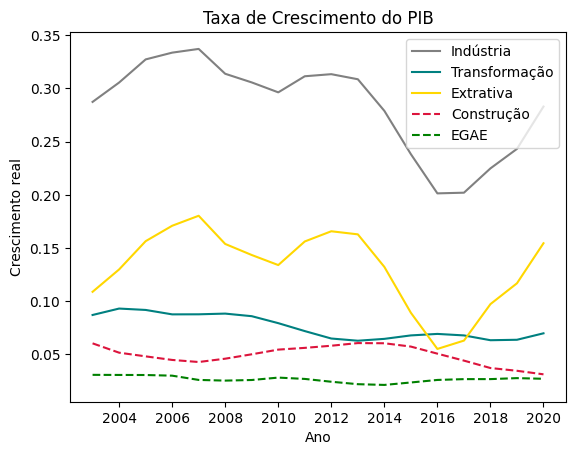

In [108]:
#FORMA DF para grafico daquelas variáveis

fig, ax = plt.subplots()
ax.plot(df_rio['Participação_Industria'].rolling(3,center=True).mean(), color='grey', label='Indústria')
ax.plot(df_rio['Participação_Indústrias de Transformação'].rolling(3,center=True).mean(), color='teal', label='Transformação')
ax.plot(df_rio['Participação_Indústrias extrativas'].rolling(3,center=True).mean(), color = 'gold', label='Extrativa')
ax.plot(df_rio['Participação_Construção'].rolling(3,center=True).mean(), color = 'crimson', label='Construção', linestyle='--')
ax.plot(df_rio['Participação_Serviços'].rolling(3,center=True).mean(), color = 'green', label='EGAE', linestyle='--')

plt.title('Taxa de Crescimento do PIB')
plt.ylabel('Crescimento real')
plt.xlabel('Ano')
plt.legend()
plt.show()